# CSCE 421 Final Project

Jeffrey Xu  
Prof. Mortazavi  
CSCE 421  
11/11/2020  

We start by making sure the versions of our improts are correct. We can do this by using pip. 

In [1]:
!pip install Pillow==6.6.2
!pip install torchvision==0.2.1

  ERROR: Could not find a version that satisfies the requirement Pillow==6.6.2 (from versions: 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 1.7.7, 1.7.8, 2.0.0, 2.1.0, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.3.2, 2.4.0, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.7.0, 2.8.0, 2.8.1, 2.8.2, 2.9.0, 3.0.0, 3.1.0rc1, 3.1.0, 3.1.1, 3.1.2, 3.2.0, 3.3.0, 3.3.1, 3.3.2, 3.3.3, 3.4.0, 3.4.1, 3.4.2, 4.0.0, 4.1.0, 4.1.1, 4.2.0, 4.2.1, 4.3.0, 5.0.0, 5.1.0, 5.2.0, 5.3.0, 5.4.0, 5.4.1, 6.0.0, 6.1.0, 6.2.0, 6.2.1, 6.2.2, 7.0.0, 7.1.0, 7.1.1, 7.1.2, 7.2.0, 8.0.0, 8.0.1)
ERROR: No matching distribution found for Pillow==6.6.2


Now we import all the required libraries for this project. 

In [9]:
import argparse
import random
import copy
import torch
import torchvision
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

We also set some initial hyperparameters. These values can change depending on how we want to implement our models. 

In [5]:
batch_size = 64
test_batch_size = 1000
seed = 42
nrow = 5
ncol = 10

Now we load in the training datasets that we are going to use for this project. 

In [7]:
imbalanced_linear_train_dataset = torch.load('imbalanced_linear_train_dataset.pt')
imbalanced_linear_train_loader = torch.utils.data.DataLoader(imbalanced_linear_train_dataset,
                                                             batch_size=batch_size, shuffle=True)

imbalanced_step_train_dataset = torch.load('imbalanced_step_train_dataset.pt')
imbalanced_step_train_loader = torch.utils.data.DataLoader(imbalanced_step_train_dataset, batch_size=batch_size,
                                                           shuffle=True)

Now we load in the testing datasets for this project. 

In [8]:
test_dataset = torch.load('test_dataset.pt')
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

We define a function that shows the distribution of the MNIST dataset. 

In [11]:
def show_mnist(arr, nrow=nrow, ncol=ncol, figsize=None):
    if figsize is None:
        figsize = (ncol, nrow)

    f, a = plt.subplots(nrow, ncol, figsize=figsize)

    def _do_show(the_figure, the_array):
        the_figure.imshow(the_array)
        the_figure.axis('off')

    for i in range(nrow):
        for j in range(ncol):
            _do_show(a[i][j], np.reshape(arr[i * ncol + j], (28, 28)))

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.draw()
    plt.savefig('examples.png')

Here, we display the distribution of our MNIST dataset. 

Distribution of classes in linear imbalanced dataset:


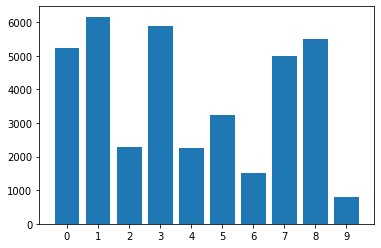

In [12]:
print('Distribution of classes in linear imbalanced dataset:')
fig, ax = plt.subplots()
_, counts = np.unique(imbalanced_linear_train_loader.dataset.train_labels, return_counts=True)
num_classes = 10
classe_labels = range(num_classes)
ax.bar(classe_labels, counts)
ax.set_xticks(classe_labels)
plt.savefig('dist linear.png')
plt.show()